#**MASKING CLUSTERING MENGGUNAKAN KMEANS**

1. Bagaimana menentukan cluster client yang perlu diberi peringatan untuk memaksimalkan penggunaan greenticknya?
2. Bagaimana menentukan prioritas client yang harus diberi peringatan lebih dahulu?

##Import library dan dataset
Import library yang dibutuhkan serta import dataset dari folder penyimpanan



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


##Data Loading
Data didapatkan dari perusahaan dan diubah ke dalam bentuk dataframe

Kolom atau variabel yang ada pada dataset:

* Masking : merupakan nama customer
* Total : merupakan total jumlah pesan yang dikirim oleh masking
* Rentang Greentick Ke Juni 2023 : rentang waktu per bulan greentick masking dari awal mulai mendapatkan greentick sampai dengan bulan Juni 2023
* Rata-rata : merupakan rata-rata pesan yang dikirim dalam sebulan sesuai dengan rentang greentick

In [ ]:
# Import dataset
data = pd.read_csv('/content/drive/MyDrive/Dataset_AI/Data Intern/Data Clustering.csv',sep=",")
data

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata
0,Customer 0,134921,12,11244
1,Customer 1,20672,3,6891
2,Customer 2,17148,4,4287
3,Customer 3,381243,4,95311
4,Customer 4,10,0,10
...,...,...,...,...
114,Customer 114,949,7,136
115,Customer 115,0,2,0
116,Customer 116,222204,20,13071
117,Customer 117,0,1,0


Output kode diatas memberikan informasi sebagai berikut:

Terdapat 119 baris dalam dataset
Ada 4 Kolom yaitu: Masking, Total, Rentang Greentick Ke Juni 2023, Rata-rata

## Exploratory Data Analysis

Melakukan beberapa tahapan sebagai berikut :

* Deskripsi Variabel
* Menangani missing value dan outliers

In [ ]:
# Cek info dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Masking                         119 non-null    object
 1   Total                           119 non-null    int64 
 2   Rentang Greentick Ke Juni 2023  119 non-null    int64 
 3   Rata-rata                       119 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 3.8+ KB


Dari output dapat dilihat bahwa:

* Ada 1 kolom bertipe object, yaitu Masking
* Terdapat 3 kolom dengan tipe data int64, yaitu Total, Rentang Greentick Ke Juni 2023, Rata-rata

In [ ]:
# Cek deskripsi data
data.describe()

,Total,Rentang Greentick Ke Juni 2023,Rata-rata
count,1.190000e+02,119.000000,1.190000e+02
mean,9.010936e+05,13.504202,6.530772e+04
std,5.418327e+06,10.701555,3.383026e+05
min,0.000000e+00,0.000000,0.000000e+00
25%,1.713000e+03,4.000000,2.030000e+02
50%,2.991200e+04,11.000000,3.509000e+03
75%,2.121400e+05,20.000000,1.527300e+04
max,5.667483e+07,41.000000,3.333814e+06


### Menangani Missing Value

Melakukan pengecekan terlebih dahulu apakah didalam dataset terdapat missing value dengan kode berikut :

In [ ]:
#cek missing value
data.isnull().sum()

Masking                           0
Total                             0
Rentang Greentick Ke Juni 2023    0
Rata-rata                         0
dtype: int64

Dapat dilihat bahwa didalam data tidak terdapat missing value


### Menangani Outliers

outliers adalah sampel yang nilainya sangat jauh dari cakupan umum data utama. Pada kasus ini, outliers akan dideteksi dengan teknik visualisasi data (boxplot). Kemudian, ouliers akan ditangani dengan teknik IQR method

<Axes: >

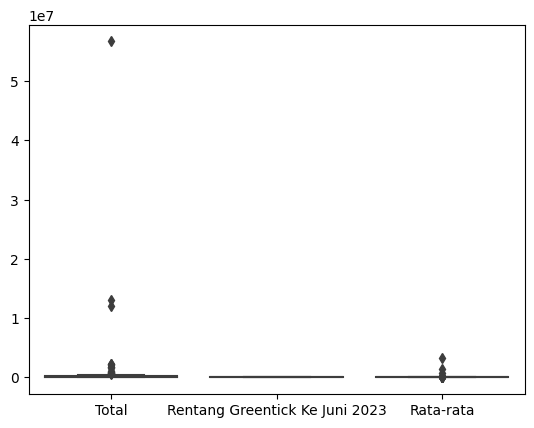

In [ ]:
# Visualisasi boxplot
import seaborn as sns
sns.boxplot(data)

In [ ]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR=Q3-Q1
outliers_data=data[((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]
clean_data=data[~((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]

# Cek ukuran dataset setelah kita drop outliers
clean_data.shape

<ipython-input-63-d7388f3588d3>:1: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = data.quantile(0.25)
<ipython-input-63-d7388f3588d3>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = data.quantile(0.75)
<ipython-input-63-d7388f3588d3>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_data=data[((data<(Q1-1.5*IQR))|(data>(Q3+1.5*IQR))).any(axis=1)]
<ipython-input-63-d7388f3588d3>:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons 

(98, 4)

## Model Development
Model development adalah tahapan di mana kita menggunakan algoritma machine learning. Pada tahap ini, kita akan mengembangkan model machine learning dengan algoritma clustering yaitu Kmeans.

In [ ]:
#scalling data
fitur = ["Total","Rentang Greentick Ke Juni 2023","Rata-rata"]
X=clean_data[fitur]
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()

X = mmscaler.fit_transform(X)
X.shape

(98, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

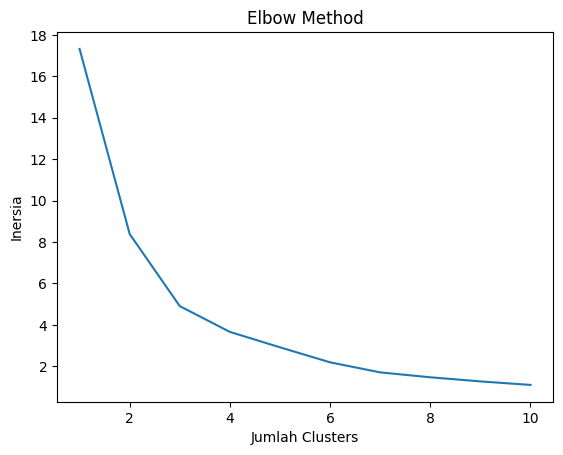

In [ ]:
#Penentuan jumlah cluster menggunakan elbow
cluster = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    cluster.append(kmeans.inertia_)
plt.plot(range(1, 11), cluster)
plt.title('Elbow Method')
plt.xlabel('Jumlah Clusters')
plt.ylabel('Inersia')
plt.show()

Dapat dilihat dari grafik diatas bahwa jumlah cluster yang kemungkinan cocok yaitu 3 cluster.

In [ ]:
# Melakukan clustering dengan jumlah cluster yang sudah ditentukan
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Menghitung Silhoutte Score
score = silhouette_score(X, kmeans.labels_, metric='euclidean')

# Print the score
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.513


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Menambahkan kolom cluster pada dataset
clean_data['Cluster'] = y_kmeans

# Menampilkan hasil clustering
clean_data

<ipython-input-88-829ffdecce9f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['Cluster'] = y_kmeans


,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,Cluster
0,Customer 0,134921,12,11244,2
1,Customer 1,20672,3,6891,1
2,Customer 2,17148,4,4287,1
4,Customer 4,10,0,10,1
5,Customer 5,82788,4,20697,2
...,...,...,...,...,...
114,Customer 114,949,7,136,1
115,Customer 115,0,2,0,1
116,Customer 116,222204,20,13071,2
117,Customer 117,0,1,0,1


In [ ]:
# melihat jumlah data per cluster dari hasil clustering
clean_data["Cluster"].value_counts()

1    60
0    23
2    15
Name: Cluster, dtype: int64

Dapat disimpulkan bahwa :
* Total untuk cluster 0 sebanyak 23 data
* Total untuk cluster 1 sebanyak 60 data
* Total untuk cluster 1 sebanyak 15 data

In [ ]:
clean_data[clean_data['Cluster'] == 0].describe()

,Total,Rentang Greentick Ke Juni 2023,Rata-rata,Cluster
count,23.000000,23.000000,23.000000,23.0
mean,59255.217391,25.565217,3501.260870,0.0
std,56280.895384,6.679862,3308.211385,0.0
min,0.000000,16.000000,0.000000,0.0
25%,11258.500000,20.000000,662.500000,0.0
50%,38275.000000,25.000000,2252.000000,0.0
75%,104716.500000,28.500000,6160.500000,0.0
max,161923.000000,41.000000,9525.000000,0.0


In [ ]:
clean_data[clean_data['Cluster'] == 1].describe()

,Total,Rentang Greentick Ke Juni 2023,Rata-rata,Cluster
count,60.000000,60.000000,60.000000,60.0
mean,13629.916667,6.083333,1966.733333,1.0
std,21042.837833,4.412201,2818.487236,0.0
min,0.000000,0.000000,0.000000,1.0
25%,151.000000,2.750000,30.250000,1.0
50%,2374.000000,5.000000,440.000000,1.0
75%,18415.500000,10.000000,3391.750000,1.0
max,72754.000000,15.000000,12313.000000,1.0


In [ ]:
clean_data[clean_data['Cluster'] == 2].describe()

,Total,Rentang Greentick Ke Juni 2023,Rata-rata,Cluster
count,15.000000,15.000000,15.000000,15.0
mean,260984.333333,18.133333,18704.333333,2.0
std,113528.958194,8.526150,6010.523993,0.0
min,82788.000000,4.000000,11084.000000,2.0
25%,187752.000000,13.000000,13092.500000,2.0
50%,222922.000000,20.000000,20375.000000,2.0
75%,352259.000000,21.000000,23499.000000,2.0
max,454770.000000,38.000000,26752.000000,2.0


<Axes: xlabel='Cluster', ylabel='Rata-rata'>

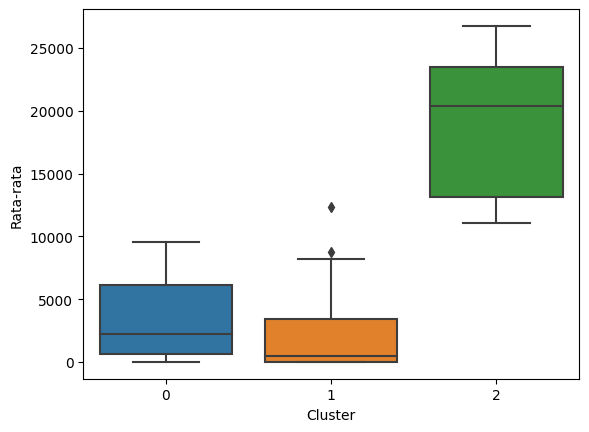

In [ ]:
sns.boxplot(x='Cluster', y='Rata-rata', data=clean_data)

Data diatas dapat dilihat bahwa :
* Total untuk cluster 0 memiliki rentang nilai greentick 16-41 dan rentang nilai rata-rata 0-9525 hal ini menandakan bahwa cluster 0 merupakan kategori **client lama**. Client lama merupakan client yang telah lama menggunakan greentick namun memiliki rata-rata yang tetap setiap bulannya.
* Total untuk cluster 1 memiliki rentang nilai greentick 0-15 dan rentang nilai rata-rata 0-12313 yang menandakan bahwa cluster 1 merupakan kategori **client warning**.  Client warning merupakan client yang dapat diberi peringatan untuk memaksimalkan penggunaan greentick untuk mengirim pesan lebih banyak.
* Total untuk cluster 2 memiliki rentang nilai greentick 4-38 dan rentang nilai rata-rata 82788-454770 hal ini menandakan bahwa cluster 2 merupakan kategori **client aman**. Client aman merupakan client yang telah memaksimalkan penggunaan greentick dengan mengirim pesan dalam jumlah yang banyak.

## Menentukan Prioritas Warning

Data yang digunakan merupakan data yang telah dicluster sebelumnya yaitu **data client warning**.

In [ ]:
war_data=clean_data[clean_data['Cluster'] == 1]
war_data

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,Cluster
1,Customer 1,20672,3,6891,1
2,Customer 2,17148,4,4287,1
4,Customer 4,10,0,10,1
6,Customer 6,61563,5,12313,1
7,Customer 7,541,6,91,1
10,Customer 10,6,4,2,1
11,Customer 11,72754,14,5197,1
12,Customer 12,25989,7,3713,1
17,Customer 17,61245,7,8750,1
18,Customer 18,248,8,31,1


In [ ]:
fitur = ["Total","Rentang Greentick Ke Juni 2023","Rata-rata"]
X=war_data[fitur]
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()

X = mmscaler.fit_transform(X)
X.shape

(60, 3)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

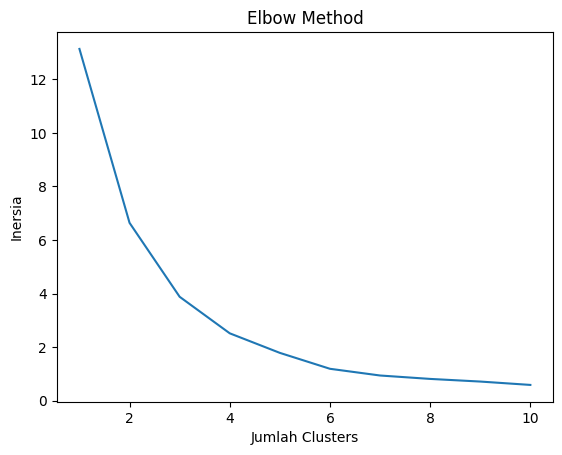

In [ ]:
cluster = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    cluster.append(kmeans.inertia_)
plt.plot(range(1, 11), cluster)
plt.title('Elbow Method')
plt.xlabel('Jumlah Clusters')
plt.ylabel('Inersia')
plt.show()

In [ ]:
# Melakukan clustering dengan jumlah cluster yang sudah ditentukan
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Calculate Silhoutte Score
score = silhouette_score(X, kmeans.labels_, metric='euclidean')

# Print the score
print('Silhouetter Score: %.3f' % score)
# Menambahkan kolom cluster pada dataset
war_data['Cluster'] = y_kmeans

# Menampilkan hasil clustering
war_data

Silhouetter Score: 0.507


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-123-0f68bcf0698e>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  war_data['Cluster'] = y_kmeans


,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,Cluster
1,Customer 1,20672,3,6891,3
2,Customer 2,17148,4,4287,3
4,Customer 4,10,0,10,0
6,Customer 6,61563,5,12313,1
7,Customer 7,541,6,91,0
10,Customer 10,6,4,2,0
11,Customer 11,72754,14,5197,1
12,Customer 12,25989,7,3713,3
17,Customer 17,61245,7,8750,1
18,Customer 18,248,8,31,2


In [ ]:
war_data["Cluster"].value_counts()

0    27
2    16
1     9
3     8
Name: Cluster, dtype: int64

<Axes: xlabel='Cluster', ylabel='Rata-rata'>

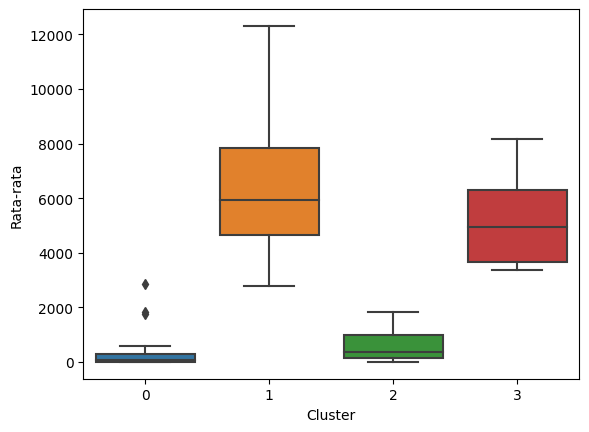

In [ ]:
sns.boxplot(x='Cluster', y='Rata-rata', data=war_data)

In [ ]:
war_data[war_data['Cluster'] == 0]

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,Cluster
4,Customer 4,10,0,10,0
7,Customer 7,541,6,91,0
10,Customer 10,6,4,2,0
20,Customer 20,189,2,95,0
21,Customer 21,169,0,169,0
22,Customer 22,310,2,155,0
23,Customer 23,4,1,4,0
24,Customer 24,2851,5,571,0
27,Customer 27,97,1,97,0
36,Customer 36,473,2,237,0


In [ ]:
war_data[war_data['Cluster'] == 1]

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,Cluster
6,Customer 6,61563,5,12313,1
11,Customer 11,72754,14,5197,1
17,Customer 17,61245,7,8750,1
19,Customer 19,55956,12,4663,1
37,Customer 37,71222,12,5936,1
73,Customer 73,52302,14,3736,1
81,Customer 81,70197,11,6382,1
105,Customer 105,38902,14,2779,1
109,Customer 109,46967,6,7828,1


In [ ]:
war_data[war_data['Cluster'] == 2]

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,Cluster
18,Customer 18,248,8,31,2
25,Customer 25,7089,12,591,2
26,Customer 26,1499,12,125,2
28,Customer 28,1555,11,142,2
39,Customer 39,18251,10,1826,2
44,Customer 44,279,10,28,2
56,Customer 56,6251,7,893,2
68,Customer 68,2434,7,348,2
70,Customer 70,11,8,2,2
77,Customer 77,18909,15,1261,2


In [ ]:
war_data[war_data['Cluster'] == 3]

,Masking,Total,Rentang Greentick Ke Juni 2023,Rata-rata,Cluster
1,Customer 1,20672,3,6891,3
2,Customer 2,17148,4,4287,3
12,Customer 12,25989,7,3713,3
29,Customer 29,24467,3,8156,3
33,Customer 33,10088,3,3363,3
38,Customer 38,13912,4,3478,3
51,Customer 51,16770,3,5590,3
55,Customer 55,24316,4,6079,3
